In [11]:
import numpy as np 
import torch 
from tqdm import tqdm 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import DataLoader 

import torchvision 
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt 

In [14]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.CNN1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.CNN2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # num_classes = 10
        
        self.relu = nn.ReLU()
        self.pooling = nn.MaxPool2d(kernel_size=2)
        
    def forward(self, x):
        
        x = self.CNN1(x)
        x = self.relu(x)
        x = self.pooling(x)
        
        x = self.CNN2(x)
        x = self.relu(x)
        x = self.pooling(x)
        
        x = x.view(-1, self.flattened_features(x))
        
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x 

    def flattened_features(self, x):
        size = x.size()[1:]
        num_feats = 1 
        for s in size:
            num_feats *= s 
        return num_feats 

In [28]:
def test(model, dataloader, criterion):
    correct = 0
    total_loss = 0
    model.eval()
    with torch.no_grad():
        for (images, labels) in dataloader:
            pred_y = model(images)
            loss = criterion(pred_y, labels)
            total_loss += loss 
            pred_y = torch.argmax(pred_y, 1)
            
            correct += (pred_y == labels).sum().item()
    
    print(f'test loss: {total_loss:.4f}\ttest accuracy: {correct/len(dataloader.dataset) * 100:.2f}%')
            

In [29]:
def train(model, train_loader, test_loader, optimizer, criterion, epochs):
    total_loss = 0 
    
    model.train()
    for epoch in range(epochs):
        for i, data in enumerate(train_loader):
            images, labels = data 
            
            optimizer.zero_grad()
            pred_y = model(images)
            
            loss = criterion(pred_y, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            if (i+1) % 1000:
                print(f'Epoch: [{epoch}/{epochs}]\t Batch: [{i+1}/{len(train_loader)}]\ttrain_loss: {total_loss/1000:.4f}\t ')
                total_loss = 0 
        
        test(model, test_loader, criterion)
    

In [30]:
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(), 
        transforms.RandomCrop(32, 4), 
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

test_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform 
)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transform
)


train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=1)
test_loader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


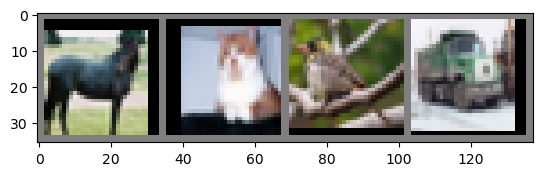

In [31]:
def imageshow(image):
    image = image/2 + 0.5 
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

num_images = 4 
imageshow(torchvision.utils.make_grid(images[:num_images]))

In [32]:
lenet = LeNet()
optimizer = optim.Adam(lenet.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train(lenet, train_loader, test_loader, optimizer, criterion, 2)

Epoch: [0/2]	 Batch: [1/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [2/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [3/6250]	train_loss: 0.0022	 
Epoch: [0/2]	 Batch: [4/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [5/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [6/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [7/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [8/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [9/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [10/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [11/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [12/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [13/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [14/6250]	train_loss: 0.0024	 
Epoch: [0/2]	 Batch: [15/6250]	train_loss: 0.0022	 
Epoch: [0/2]	 Batch: [16/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [17/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [18/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: [19/6250]	train_loss: 0.0023	 
Epoch: [0/2]	 Batch: 